# With this simple Python code, I will estimate the efficient frontier of a portfolio compound by 5 securities, all of them traded in Sao Paulo Stock Exchange, Brazil. I randomly picked the securities, and I assume the portfolio is equally weighted, just a theoretical proposition to run the codes that allow us to use Python in finance applications. The first thing that I have done is downloading historical data for Itausa (ticker ITSA4), Gerdau (GOAU4), Embraer (Embr3), Petrobras (PETR4), and CPFL, (CPFE3). After that, we created a repository for the downloaded data (we could have also used the online api provided by YahooFinance. I use the Anaconda Navigator, which is a pretty complete package for analysing financial or any orther type of data. The code will be written on next lines, hope it can be repplied by anyone willing to measure returns of any stock or any other matter.

In [77]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [112]:
assets = ['ITSA4', 'GOAU4', 'EMBR3', 'PETR4', 'CPFE']

pf_data = pd.read_csv('Pfolio_stocks_br.csv', index_col = 'Date')

In [113]:
pf_data.tail()

,ITSA4,GOAU4,EMBR3,PETR4,CPFE3
Date,,,,,
6/15/20,9.56,6.42,8.58,20.700001,31.600000
6/16/20,9.76,6.89,9.05,21.370001,31.170000
6/17/20,9.93,6.85,8.95,21.440001,31.959999
6/18/20,10.25,7.02,8.87,21.600000,31.690001
6/19/20,10.41,7.06,8.76,21.469999,32.180000


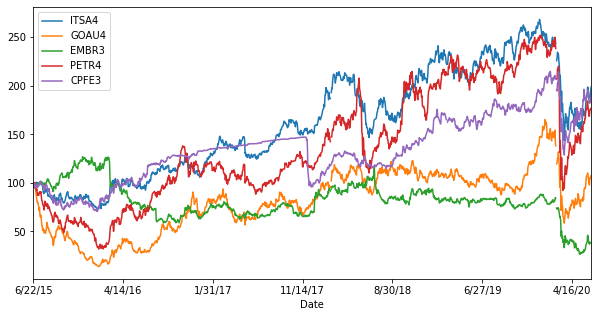

In [80]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10,5))

In [81]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [82]:
log_returns.mean() * 250

ITSA4    0.147460
GOAU4    0.032979
EMBR3   -0.176514
PETR4    0.135290
CPFE3    0.140009
dtype: float64

In [83]:
log_returns.cov() * 250

,ITSA4,GOAU4,EMBR3,PETR4,CPFE3
ITSA4,0.105690,0.096560,0.051594,0.105766,0.044924
GOAU4,0.096560,0.358410,0.079844,0.187802,0.063500
EMBR3,0.051594,0.079844,0.197067,0.077758,0.034818
PETR4,0.105766,0.187802,0.077758,0.298066,0.064922
CPFE3,0.044924,0.063500,0.034818,0.064922,0.085056


In [84]:
log_returns.corr()

,ITSA4,GOAU4,EMBR3,PETR4,CPFE3
ITSA4,1.000000,0.496124,0.357496,0.595898,0.473815
GOAU4,0.496124,1.000000,0.300429,0.574585,0.363689
EMBR3,0.357496,0.300429,1.000000,0.320833,0.268930
PETR4,0.595898,0.574585,0.320833,1.000000,0.407741
CPFE3,0.473815,0.363689,0.268930,0.407741,1.000000


In [85]:
num_assets = len(assets)

In [86]:
num_assets

5

In [87]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.25453524, 0.07332822, 0.2695369 , 0.09044521, 0.31215443])

In [88]:
weights[0] + weights[1] + weights[2] + weights[3] + weights[4]

1.0000000000000002

In [68]:
np.sum(weights * log_returns.mean()) * 250

0.11780871958272579

In [69]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.11576031168874215

In [70]:
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))

0.34023567080590206

In [114]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
     
pfolio_returns, pfolio_volatilities

([0.059078297229837894,
  0.05322155191374212,
  0.053717441430005806,
  0.07287571601083467,
  0.030040663959802167,
  0.08098834847141904,
  0.07589832811705616,
  0.055969543014869255,
  0.11406842436409524,
  -0.002684141566999856,
  0.06415137181103554,
  0.06603694725079161,
  0.12148202741684644,
  0.038838874084448166,
  0.07977839090100303,
  0.022048106785973454,
  0.06818464198683065,
  0.052055397673038795,
  0.053531067401218775,
  0.04139441659809879,
  -0.0005449388265414189,
  0.0992892213632008,
  0.01685569518311367,
  0.019078330605642645,
  0.07983110232854572,
  0.048871130582189753,
  0.08139144148715846,
  0.053849642971803516,
  0.05754002722731002,
  0.09082295393273829,
  0.051612710259164904,
  0.04731403151487898,
  0.011983040163842352,
  0.026277641847387654,
  0.06161014403571276,
  0.07928743480460833,
  0.03815495278796845,
  0.0699664883693585,
  0.05234415274467957,
  0.08740908790845556,
  0.065469704223808,
  -0.00894688571747445,
  0.07414442020374

In [103]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (100):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)
    
pfolio_returns, pfolio_volatilities

(array([ 0.13580116,  0.06524309, -0.01211748,  0.04200606,  0.05430409,
         0.02335426,  0.05680298,  0.04658753,  0.02651979,  0.03564894,
         0.01789373,  0.03774862,  0.0984792 ,  0.0248821 ,  0.09968626,
         0.09384204,  0.13435438,  0.08846063,  0.0410943 ,  0.06919818,
         0.07136854,  0.05637338,  0.06637302,  0.07150577,  0.09747325,
         0.04001706,  0.07538797,  0.03692028,  0.0216475 ,  0.01816436,
         0.02141562,  0.06034658,  0.06971372,  0.01095855,  0.07890866,
         0.10963699,  0.08419406,  0.07291319,  0.04754811, -0.05145539,
         0.04794546,  0.04530542,  0.07244092,  0.07476069,  0.06130428,
         0.10667859,  0.10349156,  0.06227063,  0.03004646,  0.03259295,
         0.04269042,  0.0730008 ,  0.0958925 ,  0.05189406, -0.02347919,
         0.0128773 ,  0.03025887,  0.12331613,  0.06025348,  0.07737427,
         0.11139069,  0.06731656,  0.02438215,  0.04270966,  0.10421771,
         0.06576015, -0.01621778,  0.0888364 ,  0.0

In [104]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [105]:
portfolios.head()

,Return,Volatility
0,0.135801,0.315871
1,0.065243,0.341903
2,-0.012117,0.314758
3,0.042006,0.268386
4,0.054304,0.373190


In [106]:
portfolios.tail()

,Return,Volatility
95,0.072157,0.347477
96,0.040754,0.352468
97,0.049056,0.285431
98,0.096483,0.398423
99,0.049170,0.317618


Text(0, 0.5, 'Expected Return')

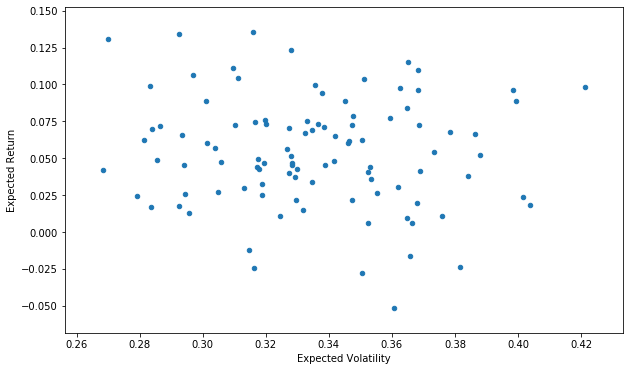

In [108]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10,6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

SyntaxError: unexpected EOF while parsing (<ipython-input-111-57afbb86196c>, line 1)